
**Вводная часть**
<br>
<br>
**Исследование определяющих успешность игры закономерностей**
<br>
<br>
Нам передали данные о играх. 
<br>
<br>
**Цель исследования:**
<br>
1)Проанализировать данные
<br>
2)Проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
<br>
<br>

**Ход исследования:**
<br>
Данные о играх я получу из файла "/datasets/games.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
<br>
<br>
Я проверю данные на пропуски и дубликаты. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, создам дополнительные таблицы для удобства, и приступлю к проведению исследовательского анализа , cоставлению портрета пользователя каждого региона и проверке гипотез.
<br>
<br>
Таким образом, моё исследование пройдёт в 6 этапов:
<br>
<br>
1)Загрузка и обзор данных.
<br>
2)Предобработка данных.
<br>
3)Проведение исследовательского анализв данных.
<br>
4)Составление портрета пользователя каждого региона.
<br>
5)Проверка определенных гипотез.
<br>
6)Написание общего вывода.



Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sns

## Шаг 1. Загрузка данных и изучение общей информации

In [2]:
data = pd.read_csv("/datasets/games.csv")

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
len(data[data.duplicated()])

0

In [8]:
data[data[["Name" , "Platform" , "Year_of_Release"]].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [9]:
data.loc[data["Name"] == "Madden NFL 13"]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [10]:
data = data.drop(index = [14244 , 16230])

In [11]:
len(data[data[["Name" , "Platform" , "Year_of_Release"]].duplicated()])

0

In [12]:
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


В столбцах Name и Genre имеются всего лишь два пропуска, и они находятся в одинаковых строчках. Я считаю мы можем их убрать, так как их всего 2, и мы не сможем их восстановить. Сделаем это сразу. 

In [13]:
data = data.dropna(subset = ["Genre"])

Вывод
<br>
Видно большое количество пропусков.
<br>
Year_of_Release - имеет формат float, а должен быть int
<br>
User_Score - имеет тип object, а должен быть float

## Шаг 2. Предобработка данных

### Замена названий в столбцах

In [14]:
data = data.rename(columns = {"Name" : "name" , "Platform" : "platform" , "Year_of_Release" : "year_of_release" , "Genre" : "genre", "Other_sales" : "other_sales" , "Critic_Score" : "critic_score" , "User_Score" : "user_score" , "Rating" : "rating"})

In [15]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   NA_sales         16712 non-null  float64
 5   EU_sales         16712 non-null  float64
 6   JP_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [19]:
data["critic_score"].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [20]:
#Приведем года в целочисленный тип
data["year_of_release"] = data["year_of_release"].astype("Int64")

In [21]:
#Приведем оценки критиков в целочисленный тип
data["critic_score"] = data["critic_score"].astype("Int64")

In [22]:
#Оценки пользователей приведем к вещественному типу данных
data['user_score'] = data['user_score'].apply(pd.to_numeric, errors='coerce')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   NA_sales         16712 non-null  float64
 5   EU_sales         16712 non-null  float64
 6   JP_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


### Обработайтка пропусков

В технической литературе и проектной документации TBD обычно используется для обозначения неопределенных деталей или решений в проекте.Таким образом мы должны заменить данную аббревиатуру на Nan. Мы это сделали в прощлом пункте, когда изменяли тип данных столбца 'user_score' на float. Аббревиатура , была автоматически заменена на Nan.Ниже приведу доказательства.

In [24]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

В данном случае стлбцы "critic_score", "user_score", "rating" имеют параметры, которые индивидуальны для каждого случая, следовательно мы не можем заполнить пропуски. В столбце "year_of_release" нужно проверить процентное соотношение пропусков и всех данных, если оно мало, то считаю, что можем их удалить, так как для дальнейшего анализа нам нужны данные с годом.

In [26]:
print(round((len(data[data["year_of_release"].isna()]) / len(data["year_of_release"])) * 100 , 2) , "%")

1.61 %


Процентное соотношение мало, следовательно удаляем.

In [27]:
data = data.dropna(subset = ["year_of_release"])


In [28]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбце rating могли возникнуть по причине того, что возможно компания, которая определяет рейтинг редко рассматривает японские игры, так как японии  очень большой процент пропусков в данном столбце. Данная догадка подкрепляется графиком ниже.
<br>
<br>
Что касается других столбцов, можно предположить достаточно много очень непопулярных игр, которым пользователи и тем более критики не ставят оценки. Также дело может быть в технических проблемах.
<br>
<br>
Пропуски в столбце с годами выпуска могли произойти из-за того, что не было информации о годах выпуска очень старых игр

### Суммарные продажи во всех регионах в отдельном столбце.

In [29]:
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [30]:
data["all_sales"] =  data["NA_sales"]+data["EU_sales"]+data["JP_sales"]+data["other_sales"]

In [31]:
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [32]:
tmp = data.groupby("year_of_release").count()["name"].copy()
tmp

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

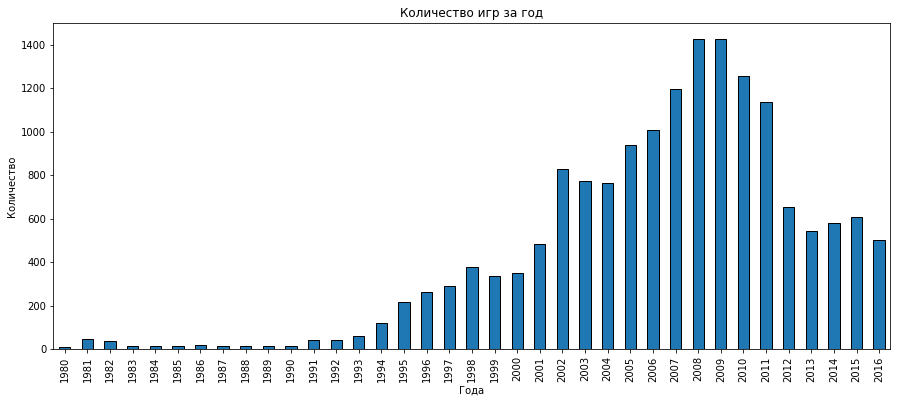

In [33]:
plt.figure(figsize=(15,6));
tmp.plot(kind = "bar" , ec='black');
plt.title("Количество игр за год");
plt.xlabel("Года");
plt.ylabel("Количество");
plt.show()

До 1994 года кол-во игр было значительно маленьким,можно предположить, что это было связано с тем, что компьютеры и технологии тех времен не позволяли делать большое количество игр, также в те времена компьютеры были у мало у кого. После 2000го года наблюдается резкий скачок . Пик приходится на 2008-2009 года. После этих годов начался спад, можно предположить , что он связан с популяризацией мобильного гейминга или с тем, что игры стали более масштабные и на их разработку стало уходить большое количество врмени.

Можем удалить данные о играх выпущенных ранее 1994 года

In [34]:
data_1994 = data[data["year_of_release"] >= 1994].copy()
data_1994

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


### Распределение по годам платформ с наибольшими суммарными продажами.

In [35]:
data_1994 = data_1994.reset_index(drop = True)


In [36]:
data_1994

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16073,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16074,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16075,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16076,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


In [37]:
data_1994.groupby("platform").agg(["sum"])["all_sales"].sort_values(by = "sum" , ascending = False)

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [38]:
tmp1 = data_1994.groupby("platform").agg(["sum"])["all_sales"].sort_values(by = "sum" , ascending = False).head(6).copy()

Выделим первые 6 платформ как лидеров по суммарным продажам

In [39]:
tmp1 = tmp1.reset_index()
tmp1

,platform,sum
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.76
5,PS,727.58


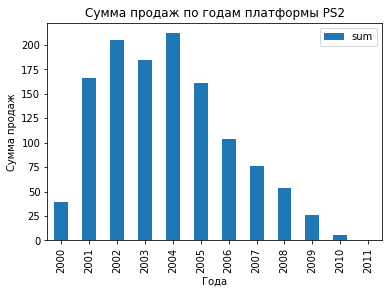

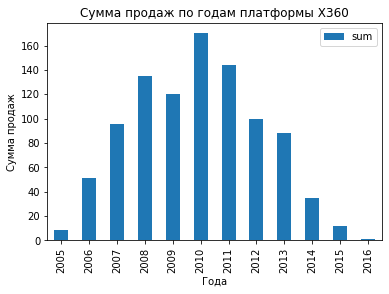

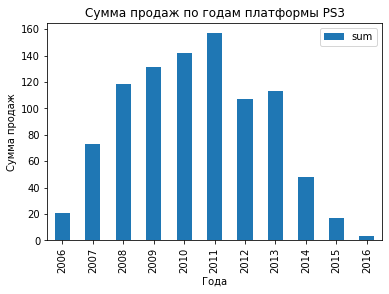

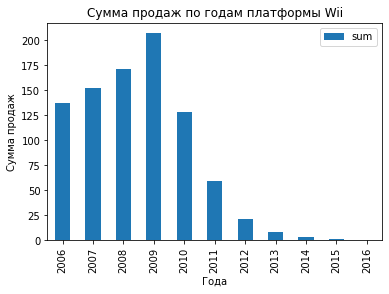

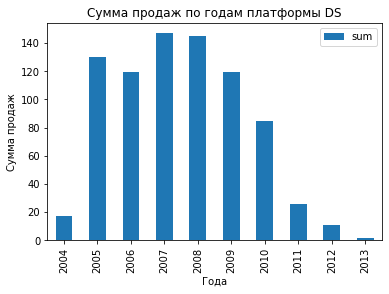

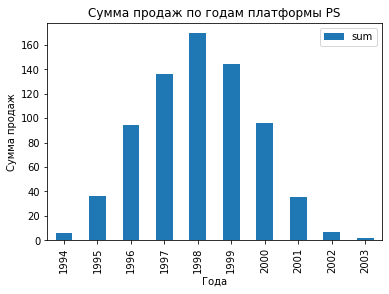

In [40]:
for item in tmp1["platform"]:
    tmp = data_1994.loc[data_1994["platform"] == item].groupby("year_of_release").agg(["sum"])["all_sales"]
    tmp.plot(kind = "bar")
    plt.title(f"Сумма продаж по годам платформы {item}");
    plt.xlabel("Года");
    plt.ylabel("Сумма продаж");
    plt.show()
    

Судя по графикам мы можем сказать, что жизнь каждой платформы равна примерно 10 годам
<br>
<br>
1) PS2: 2000 - 2010 года
<br>
2) Х360: 2005 - 2015 года
<br>
3) PS3: 2006 - 2016 года
<br>
4) Wii: 2006 - 2014 года
<br>
5) DS: 2004 - 2013 года
<br>
6) PS: 1994 - 2003 года

Это вполне логично, так как характеристики консоли со временем устаревают

### Взять данные за актуальный период, которые помогут построить прогноз на 2017 год.

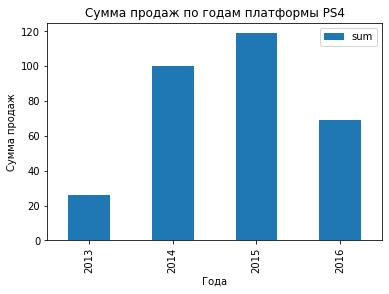

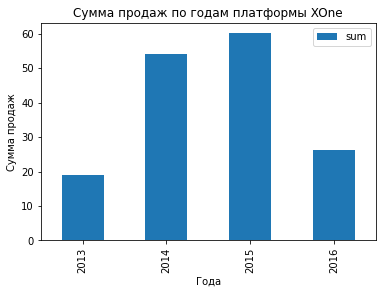

In [41]:
for item in ["PS4" , "XOne"]:
    tmp = data_1994.loc[data_1994["platform"] == item].groupby("year_of_release").agg(["sum"])["all_sales"]
    tmp.plot(kind = "bar")
    plt.title(f"Сумма продаж по годам платформы {item}");
    plt.xlabel("Года");
    plt.ylabel("Сумма продаж");
    plt.show()

На основе ранее потроенных графиков мы можем сказать, что консоли прошлого поколения идут на спад примерно к 2013му году, а консоли нового поколения, по которым мы как раз таки будем делать прогноз на 2017й год, идут на повышение, следовательно берем актулаьные данные начиная с 2013 года.

In [42]:
data = data.loc[data["year_of_release"] >= 2013]
data = data.reset_index(drop = True)

In [43]:
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


### Платформы, которые лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [44]:
data.groupby("platform").agg(["sum"])["all_sales"].sort_values(by = "sum" , ascending = False)

,sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [45]:
tmp3 = data.groupby("platform").agg(["sum"])["all_sales"].sort_values(by = "sum" , ascending = False).head(5).copy()

In [46]:
tmp3

,sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [47]:
tmp3 = tmp3.reset_index()
tmp3

,platform,sum
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


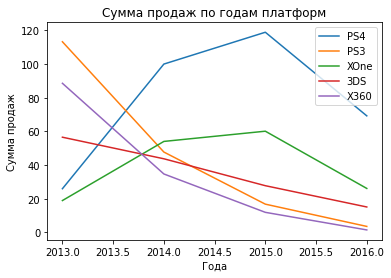

In [48]:
for item in tmp3["platform"]:
    tmp = data.loc[data["platform"] == item].groupby("year_of_release").agg(["sum"])["all_sales"]
    tmp = tmp.reset_index()
    plt.plot(tmp["year_of_release"] , tmp["sum"] , label = item)
plt.legend()
plt.title("Сумма продаж по годам платформ");
plt.xlabel("Года");
plt.ylabel("Сумма продаж");
plt.show()
    
   

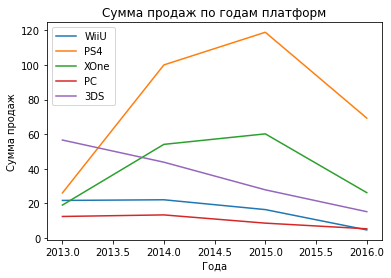

In [49]:
for item in ['WiiU' , 'PS4' , 'XOne' , 'PC' , '3DS']:
    tmp = data.loc[data["platform"] == item].groupby("year_of_release").agg(["sum"])["all_sales"]
    tmp = tmp.reset_index()
    plt.plot(tmp["year_of_release"] , tmp["sum"] , label = item)
plt.legend()
plt.title("Сумма продаж по годам платформ");
plt.xlabel("Года");
plt.ylabel("Сумма продаж");
plt.show()

Исходя из графика мы можем сказать, что продажи снижаются

Под конец 2016го года лидируют по продажам платформы:
<br>
1) PS4
<br>
2) XOne
<br>
3) 3DS


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [50]:
data.head(5)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


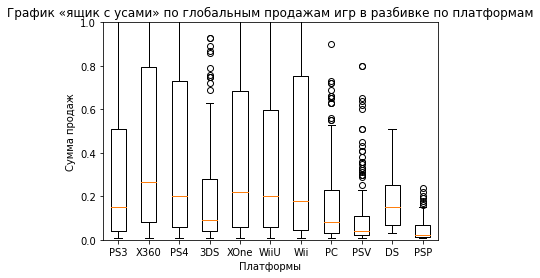

In [51]:
d = []
data["platform"].unique()
for item in data["platform"].unique():
    tmp4 = data.loc[data["platform"] == item , "all_sales"]
    d.append(tmp4)
plt.boxplot(d)
plt.ylim(0,1)
plt.xticks(range(1,12) , data["platform"].unique())
plt.title("График «ящик с усами» по глобальным продажам игр в разбивке по платформам");
plt.xlabel("Платформы");
plt.ylabel("Сумма продаж");
plt.show()

In [52]:
data.groupby("platform")["all_sales"].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


5 платформы для для предсказания результата на 2017й год

In [53]:
data_5 = data[data['platform'].isin(['WiiU' , 'PS4' , 'XOne' , 'PC' , '3DS'])].copy()

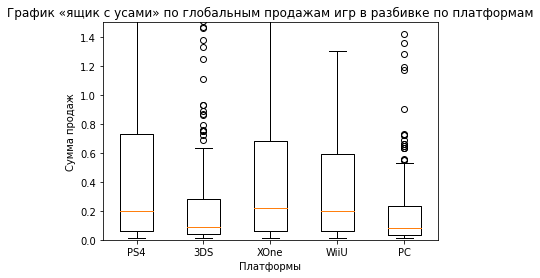

In [54]:
d1 = []
data_5["platform"].unique()
for item in data_5["platform"].unique():
    tmp4 = data_5.loc[data_5["platform"] == item , "all_sales"]
    d1.append(tmp4)
plt.boxplot(d1)
plt.ylim(0,1.5)
plt.xticks(range(1,6) , data_5["platform"].unique())
plt.title("График «ящик с усами» по глобальным продажам игр в разбивке по платформам");
plt.xlabel("Платформы");
plt.ylabel("Сумма продаж");
plt.show()

Вывод:
<br>
Наибольшие медианные продажи у платформ WiiU и XOne, далее идет PS4.Можно предположитьm что положение Xbox One и PlayStation 4 связано тем, что данные приставки позднее остальных вышли на рынки.У большинства платформ есть много выбросов, можно предположить это игры которые многим понравились или от популярных студий разработки.Компьютерные игры почти всегда стоят намного дешевле консольных игр отсюда скорее всего ткая разница.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

В качестве популярной платформы возьмем XOne

In [55]:
data_tmp = data.loc[data["platform"] == "XOne"].copy()
data_tmp = data_tmp.reset_index(drop = True)

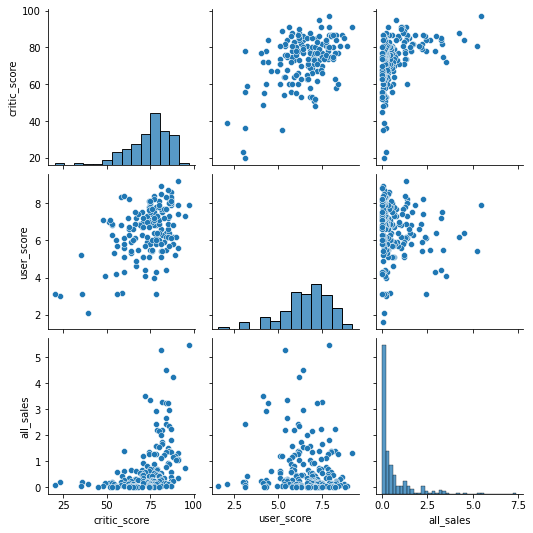

In [56]:
sns.pairplot(data.loc[data["platform"] == "XOne"][["critic_score" , "user_score" , "all_sales"]]);
plt.show()

На графиках видна несильная, но закономерность, чем лучше оценка критиков, тем игра лучше, и больше продаж, также есть довольно много выбросов, когда у игры высокие ценки, но маленькие продажи

In [57]:
data_tmp[["critic_score" , "user_score" , "all_sales"]].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
all_sales,0.416998,-0.068925,1.000000


Корреляция между all_sales и critic_score равна 0.47, значит есть зависимость.
<br>
Корреляции между all_sales и user_score равна -0.068925, значит зависимости нет.
<br>
В итоге видим, что оценки критиков влияют на продажи игр на платформе XOne, а оценки пользователей не влияют на продажи игр на платформе XOne

### Выводы с продажами игр на других платформах

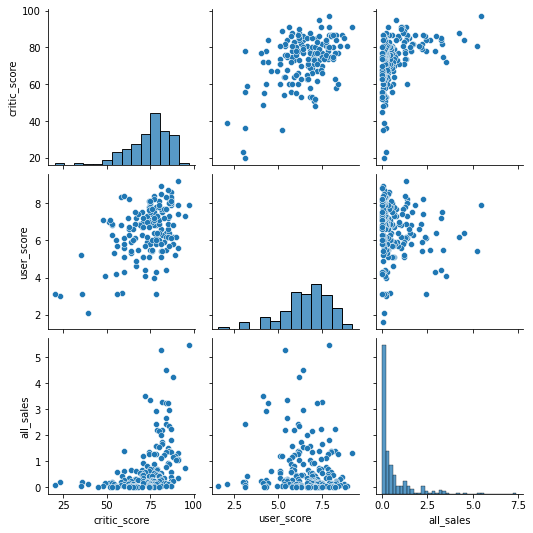

In [58]:

sns.pairplot(data.loc[data["platform"] == "XOne"][["critic_score" , "user_score" , "all_sales"]]);
plt.show()

           ------ WiiU ------


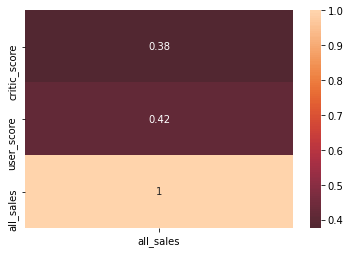

           ------ PS4 ------


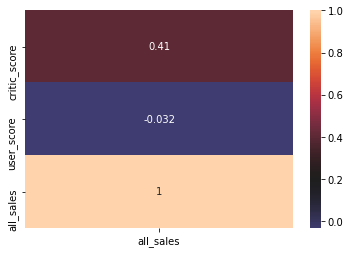

           ------ XOne ------


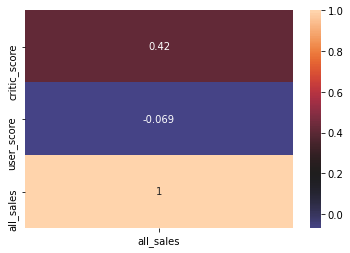

           ------ PC ------


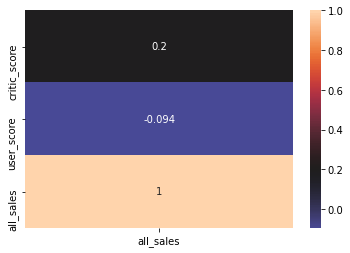

           ------ 3DS ------


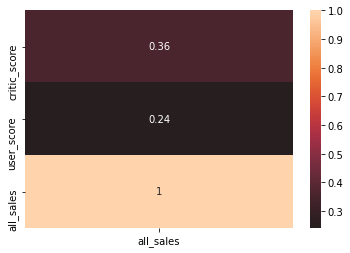

In [59]:
for item in ['WiiU' , 'PS4' , 'XOne' , 'PC' , '3DS']:
    print(f"           ------ {item} ------")
    data_tmp = data.loc[data["platform"] == item].copy()
    sns.heatmap(data_tmp[["critic_score" , "user_score" , "all_sales"]].corr()[["all_sales"]], annot=True , center = 0.2);
    plt.show()

Продажи игр на Платформах PS4 и PC также зависят тольок от оценок критиков, как и у XOne. А зависимость продажи игр на латформах WiiU и 3DS другая. Продажи игр на латформах WiiU зависят больше от оценок пользователей, чем от оценок критиков от критиков 0.38 коэффициент кореляции, от пользователей 0.42. Продажи игр на латформах 3DS зависят как от оценок пользователей, так и от оценок критиков(от критиков больше)


### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Суммы продаж и количество игр по жанрам на 5ти платформах 'WiiU' , 'PS4' , 'XOne' , 'PC' , '3DS':

In [60]:
tmp5 = data_5.groupby("genre").agg(["sum" , "count"])["all_sales"].sort_values(by = "sum").copy()
tmp5

,sum,count
genre,,
Puzzle,3.07,14
Strategy,8.56,42
Adventure,13.03,83
Simulation,19.76,47
Fighting,25.50,38
Racing,30.26,57
Misc,30.81,93
Platform,33.75,49
Sports,88.59,110


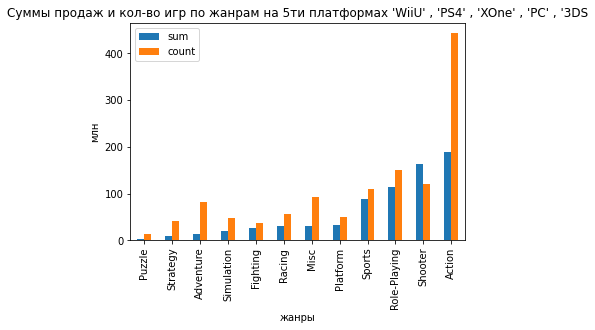

In [61]:
tmp5.plot(kind = "bar")
plt.title("Суммы продаж и кол-во игр по жанрам на 5ти платформах 'WiiU' , 'PS4' , 'XOne' , 'PC' , '3DS");
plt.xlabel("жанры");
plt.ylabel("млн");
plt.show()

Больше всего игр жанра Action, Playing и Sports

Суммы продаж и количество игр по жанрам на всех платформах:

In [62]:
tmp5 = data.groupby("genre").agg(["sum" , "count"])["all_sales"].sort_values(by = "sum").copy()
tmp5

,sum,count
genre,,
Puzzle,3.17,17
Strategy,10.08,56
Simulation,21.76,62
Adventure,23.64,245
Fighting,35.31,80
Racing,39.89,85
Platform,42.63,74
Misc,62.82,155
Role-Playing,145.89,292


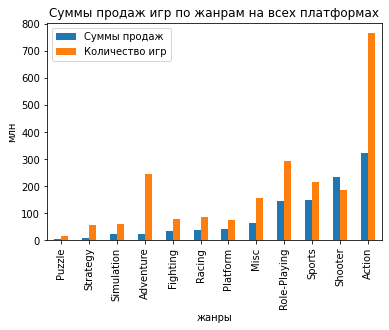

In [63]:
tmp5.plot(kind = "bar")
plt.title("Суммы продаж игр по жанрам на всех платформах");
plt.xlabel("жанры");
plt.ylabel("млн");
plt.legend(["Суммы продаж" , "Количество игр"])
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
    
Легенды стоит делать на русском языке. </div>

<div class="alert alert-info"> <b>Комментарии студента:</b><br> 
   Сделал на русском языке</div>

Посчитаем самые прибыльные жанры

In [64]:
tmp5["conv"] = tmp5["sum"] / tmp5["count"]

In [65]:
tmp5.sort_values(by = "conv" , ascending = False)

,sum,count,conv
genre,,,
Shooter,232.98,187,1.245882
Sports,150.65,214,0.703972
Platform,42.63,74,0.576081
Role-Playing,145.89,292,0.499623
Racing,39.89,85,0.469294
Fighting,35.31,80,0.441375
Action,321.87,766,0.420196
Misc,62.82,155,0.405290
Simulation,21.76,62,0.350968


**Вывод**
<br>
Больше всего продаж игр жанра Action, можно предположить, что это связано с тем, что игр этого жанра выпускается больше всех остальных. Далее идут Штуры и игры про спорт, что тоже вполне ожидаемо, так как в обеих категориях есть очень популярные игры. Можно заметить, что Шутеров производится меньше, чем игр про спорт, однако прибыль у шутеов значитально больше. Также отметим, что Adventure сильно отстаёт по продажам, хотя игр выпускается много.
<br>
<br>
Исходя из соотношение выпущенных игр по жанрам к их сумарным продажам:
<br>
Самый прибылный жанр - Шутеры
<br>
Самый не прибыльный - Адвенчюры

## Шаг 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)(NA, EU, JP)

------ NA_sales ------
  platform     sum
0      PS4  108.74
1     XOne   93.12
2     X360   81.66
3      PS3   63.50
4      3DS   38.20
5     WiiU   29.21


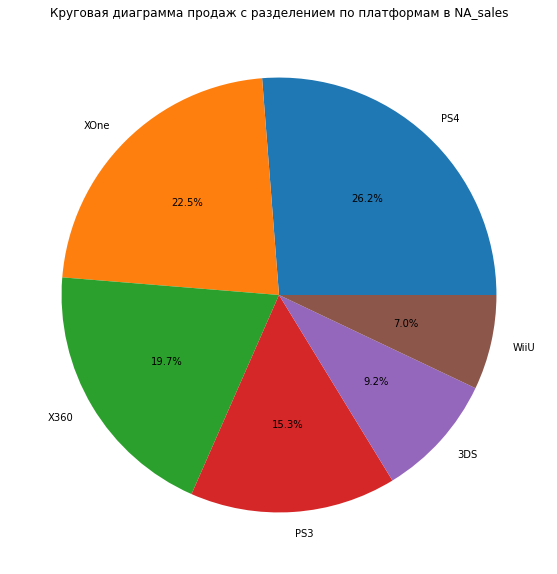

------ EU_sales ------
  platform     sum
0      PS4  141.09
1      PS3   67.81
2     XOne   51.59
3     X360   42.52
4      3DS   30.96
5       PC   25.36


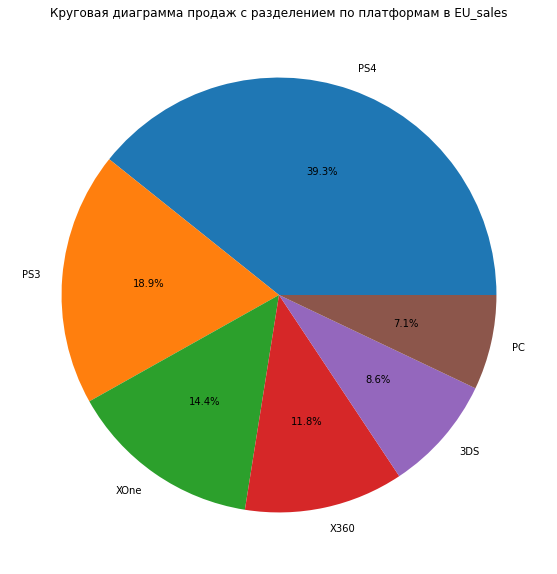

------ JP_sales ------
  platform    sum
0      3DS  67.81
1      PS3  23.35
2      PSV  18.59
3      PS4  15.96
4     WiiU  10.88
5      PSP   3.29


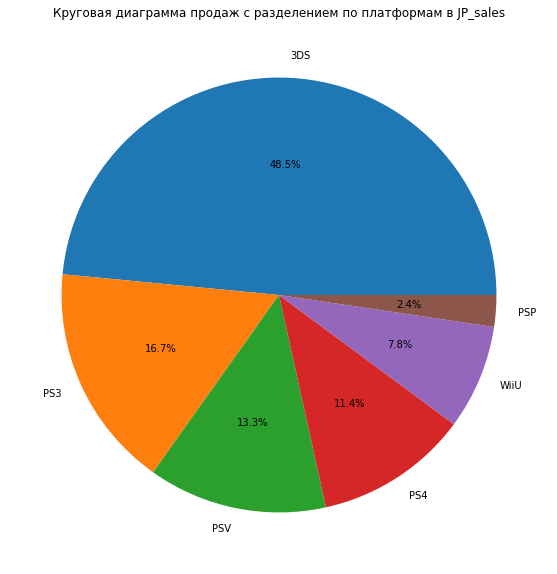

In [66]:
for item in ["NA_sales" , "EU_sales" , "JP_sales"]:
    print(f"------ {item} ------")
    tmp6 = data.groupby("platform").agg(["sum"])[item].sort_values(by = "sum" , ascending = False).head(6).copy()
    tmp6 = tmp6.reset_index()
    print(tmp6)
    plt.figure(figsize=(20,10));
    plt.pie(tmp6["sum"] , labels = tmp6["platform"] , autopct='%1.1f%%');
    plt.title(f"Круговая диаграмма продаж с разделением по платформам в {item}");
    plt.show()
    

В Северной Америке больше всег продаются игры на XOne и PS4, также много народу пользуются приствками прошлого поколения X360 и PS3
<br>
<br>
В Европе самой популярной платформой является PS4, далее PS3 и Xone.
<br>
<br>
В Японии однозначный лидер - 3DS. Далее PS3 и PSV.

### Самые популярные жанры (топ-5)(NA, EU, JP)

------ NA_sales ------
          genre     sum
0        Action  126.05
1       Shooter  109.74
2        Sports   65.27
3  Role-Playing   46.40
4          Misc   27.49
5      Platform   18.14


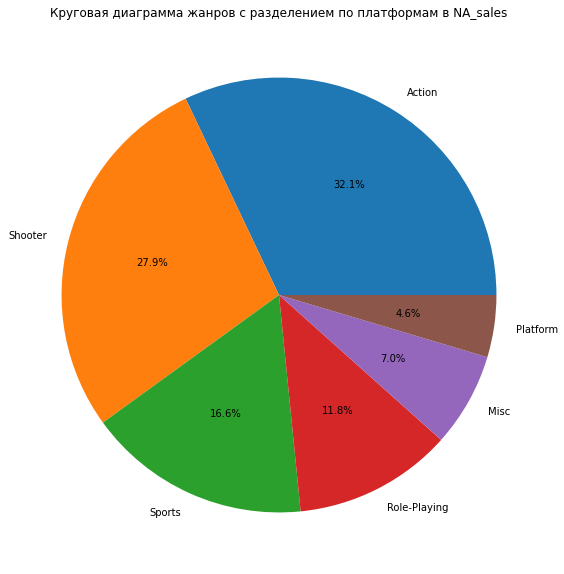

------ EU_sales ------
          genre     sum
0        Action  118.13
1       Shooter   87.86
2        Sports   60.52
3  Role-Playing   36.97
4        Racing   20.19
5          Misc   20.04


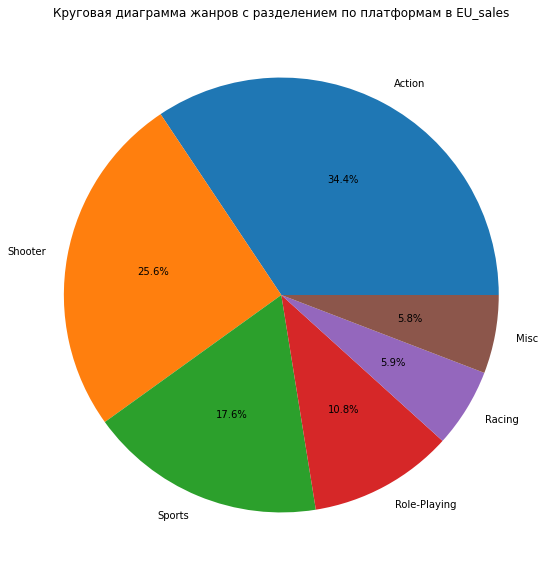

------ JP_sales ------
          genre    sum
0  Role-Playing  51.04
1        Action  40.49
2          Misc   9.20
3      Fighting   7.65
4       Shooter   6.61
5     Adventure   5.82


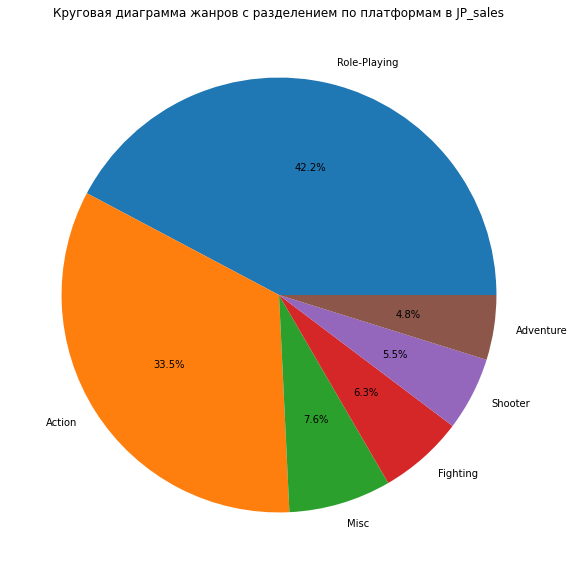

In [67]:
for item in ["NA_sales" , "EU_sales" , "JP_sales"]:
    print(f"------ {item} ------")
    tmp6 = data.groupby("genre").agg(["sum"])[item].sort_values(by = "sum" , ascending = False).head(6).copy()
    tmp6 = tmp6.reset_index()
    print(tmp6)
    plt.figure(figsize=(20,10));
    plt.pie(tmp6["sum"] , labels = tmp6["genre"] , autopct='%1.1f%%');
    plt.title(f"Круговая диаграмма жанров с разделением по платформам в {item}");
    plt.show()

В Северной Америке и Европе популярные жанры очень похожи. Экшены, спортивные игры и шутеры впереди. В Европе больше играют в гонки.

В Японии популярные жанры сильно отличаются - на первом месте ролевые игры, причем с большой разницей. Также большой процент у экшн игр.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [68]:
data["rating"].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [69]:
def change(item):
    if item == "E":
        return "Для всех"
    elif item == "M":
        return ">17"
    elif item == "T":
        return ">13"
    elif item == "E10+":
        return ">10"
data["rating_desc"] = data.loc[data["rating"].notnull() , "rating"].apply(change)

In [70]:
data["rating_desc"] = data['rating_desc'].fillna("Нет рейтинга")

------ NA_sales ------
                 sum
rating_desc         
>13            49.79
>10            54.24
Для всех       79.05
Нет рейтинга   89.42
>17           165.21


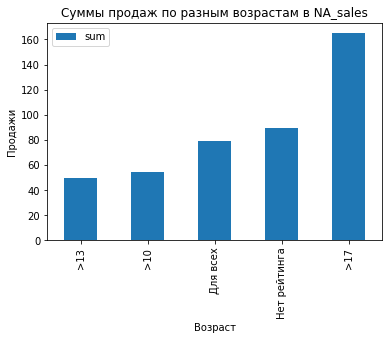

------ EU_sales ------
                 sum
rating_desc         
>13            41.95
>10            42.69
Нет рейтинга   78.91
Для всех       83.36
>17           145.32


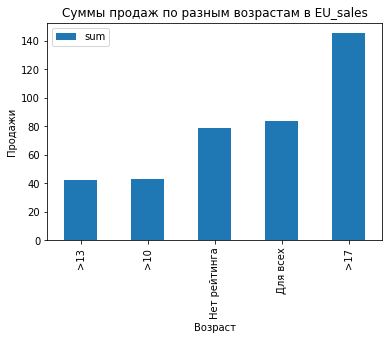

------ JP_sales ------
                sum
rating_desc        
>10            5.89
>17           14.11
Для всех      15.14
>13           20.59
Нет рейтинга  85.05


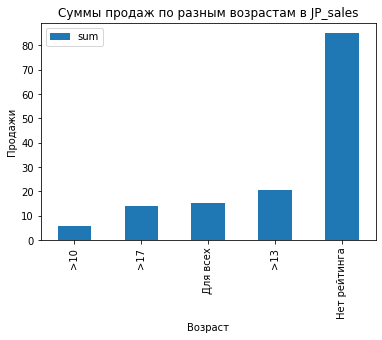

In [71]:
for item in ["NA_sales" , "EU_sales" , "JP_sales"]:
    print(f"------ {item} ------")
    tmp7 = data.groupby("rating_desc").agg(["sum"])[item].sort_values(by = "sum").copy()
    print(tmp7)
    tmp7.plot(kind = "bar")
    plt.title(f"Суммы продаж по разным возрастам в {item}");
    plt.xlabel("Возраст");
    plt.ylabel("Продажи");
    plt.show()

В Северной Америке и в Европе ситуация практическиодинаковая. Больше всего игр продано с рейтингом >17. Далее для всех и без рейтинга.
<br>
<br>
В Японии ситуация отличается. Лидер - "Не определен", Возможно компания, которая определяет рейтинг редко рассматривает японские игры. Далее категория >13, для всех и >17

## Шаг 5. Проверка гипотез

### Гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Пороговое значение alpha установим в 5%
<br>
<br>
Н0(нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>
<br>
Н1(альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC различны.

In [72]:
l_xb = data[data['platform']=="XOne"]['user_score'].dropna() 
l_pc = data[data['platform']=="PC"]['user_score'].dropna()

Два независимых набора данных, следовательно используем st.ttest_ind()

In [73]:
alpha = 0.05 

result = st.ttest_ind(l_xb, l_pc, equal_var = False)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу.
<br>
<br>
Верно, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Скорее всего это потому что у них большая часть одинаковых игр.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Пороговое значение alpha установим в 5%
<br><br>

Н0(нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
<br><br>
Н1(альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports разные.

In [74]:
l_action = data[data['genre']=="Action"]['user_score'].dropna()
l_sport = data[data['genre']=="Sports"]['user_score'].dropna()

Два независимых набора данных, следовательно используем st.ttest_ind()

In [75]:
alpha = .05 

result1 = st.ttest_ind(l_action, l_sport , equal_var = False)

print('p-значение:', result1.pvalue)

if (result1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Статистический анализ показал, что вероятность получить такие различия случайно очень низкая (p-value < 0.05), поэтому мы отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Шаг 6. Общий вывод


- **Шаг 1. Загрузка данных и изучение общей информации**
    - Ознакомились с данными, посмотрели на общую информацию о датасете, выявили пропуски и не соответствие типов данных.
- **Шаг 2. Предобработка данных**
    - Мы обнаружили необычное значени tbd - "to be determined" и заменили это значение на NaN.
    - Изменили типы данных в различных колонках
    - Переименовали столбцы
    - Многие пропуски были оставлены незаполненными, чтобы не исказить статистику.
    - Также мы посчитали общее количество продаж по всем регионам и записали результат в столбец "all_sales".
- **Шаг 3. Исследовательский анализ данных**
    - Обнаружили, что до 1994 года выпускалось достаточно мало игр, а после 1994 года пошел рост, пик на 2008-2009 гг.
    - Характерный срок жизни платформы - 10 лет, поэтому оставим данные с 2013 по 2016 гг.
    - Выбрали 5 прибыльных платформ - PS4, XOne, 3DS, PS3, X360.
    - Под конец 2016го года лидируют по продажам платформы: PS4, XOne и 3DS
    - Наибольшие медианные продажи у платформ X360.
    - Почти у всех платформ есть определенные игры, которые оказались очень успешными(выбросы).
    - У платформ 'WiiU' , 'PS4' , 'XOne' , 'PC' , '3DS' есть связь между оценками критиков и продажами игр
    - Больше всего игр жанра Action, затем идут Shooter и Sport.
    - Лучше всего в продаже игры жанра Action, Role-Playing, adventure 
    - Самый прибылный жанр - Шутеры 
    - Самый не прибыльный - Адвенчюры
- **Шаг 4. Портрет пользователя региона**
    - В Северной Америке больше всег продаются игры на XOne и PS4, также много народу пользуются приствками прошлого поколения X360 и PS3 
    - В Европе самой популярной платформой является PS4, далее PS3 и Xone. 
    - В Японии однозначный лидер - 3DS. Далее PS3 и PSV.
    - В NA и EU самые популярные жанры практически совпадают(Action и Shooter). В JP лидер - Playing.
    - В Северной Америке и в Европе ситуация практически одинаковая. Больше всего игр продано с рейтингом >17. Далее для всех и без рейтинга. 
    - В Японии ситуация отличается. Лидер - "Не определен", Возможно компания, которая определяет рейтинг редко рассматривает японские игры. Далее категория >13, для всех и >17
- **Шаг 5. Проверка гипотез**
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
    - Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась!.
<br>
<br>
Рекоммендации для кампании на 2017 год:
<br>
Можно предположить, что нужно сделать ставку на консоли нового поколения в зависимости от популрянх консолей в регионе. Такая же ситуация с жанром и возростному рейтингу. Судя по полуярности рейтинга M - основная часть пользователей старше 17 лет. Также стоит учитывать рейтинг критиков на вышедшую игру, чем он выше тем больше будет продаж.
<br>
Стоит учесть, что в конце актуального периода продажи игра падали по всем платформам, вероятно выручка в 2017 году будет меньше чем в 2016 пока не появятся консоли нового поколения,так как после выхода новых консолей резко начинают расти продажи игр.



























